In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
tf.random.set_seed(18)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

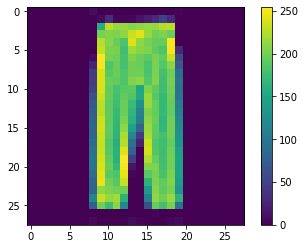

In [9]:
plt.figure()
plt.imshow(X_train[21])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_test.shape

(10000, 28, 28, 1)

In [9]:
X_train, X_test = X_train/255 , X_test/255

In [10]:
X_val, X_train = X_train[:5000], X_train[5000:]
y_val, y_train = y_train[:5000], y_train[5000:]

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [46]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 300)               1622700   
_________________________________________________________________
dense_34 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [48]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
early_callbacks = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
check_point = keras.callbacks.ModelCheckpoint('early_stopping_CNN.h5', save_best_only=True)

In [59]:
model_history = model.fit(X_train, y_train, epochs=13, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_callbacks, check_point])

Epoch 1/13
860/860 [==============================] - 21s 24ms/step - loss: 0.1354 - accuracy: 0.9488 - val_loss: 0.2523 - val_accuracy: 0.9166
Epoch 2/13
860/860 [==============================] - 21s 24ms/step - loss: 0.1089 - accuracy: 0.9600 - val_loss: 0.2563 - val_accuracy: 0.9208
Epoch 3/13
860/860 [==============================] - 22s 26ms/step - loss: 0.0892 - accuracy: 0.9663 - val_loss: 0.2998 - val_accuracy: 0.9146
Epoch 4/13
860/860 [==============================] - 22s 25ms/step - loss: 0.0733 - accuracy: 0.9726 - val_loss: 0.3088 - val_accuracy: 0.9236


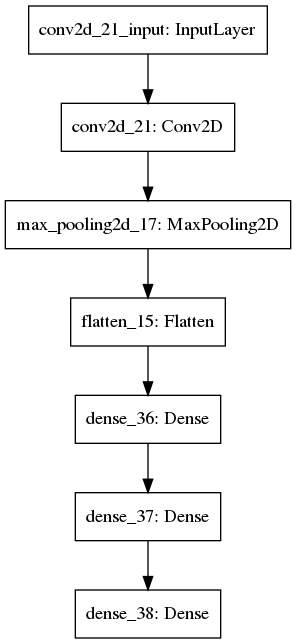

In [60]:
import pydot
keras.utils.plot_model(model)

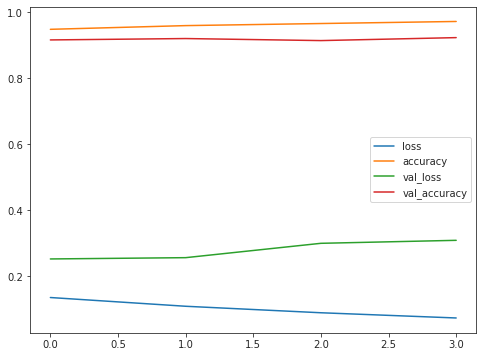

In [61]:
import pandas as pd
sns.set_style('ticks')
pd.DataFrame(model_history.history).plot(figsize=(8,6))

In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2756 - accuracy: 0.9067


[0.2756446897983551, 0.9067000150680542]